<a href="https://colab.research.google.com/github/HenHimA1/hmmlearn/blob/master/examples/plot_hmm_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hmmlearn/hmmlearn.git

Cloning into 'hmmlearn'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 1702 (delta 28), reused 42 (delta 21), pack-reused 1643
Receiving objects: 100% (1702/1702), 2.09 MiB | 23.29 MiB/s, done.
Resolving deltas: 100% (1024/1024), done.


In [2]:
!cd /content/hmmlearn/ && pip install .

Processing /content/hmmlearn
  Created wheel for hmmlearn: filename=hmmlearn-0.2.3.post13+ge872126-cp36-cp36m-linux_x86_64.whl size=324412 sha256=36e9c98b7abe93896f63b7173b51d65aa7e37c8aba4cfadceff71e9dee353b54
  Stored in directory: /tmp/pip-ephem-wheel-cache-ltm21z14/wheels/60/c7/fc/81921765725af6fb95ebf1b925a2fead0c99a124211aabadea
Successfully built hmmlearn



Sampling from HMM
-----------------

This script shows how to sample points from a Hiden Markov Model (HMM):
we use a 4-components with specified mean and covariance.

The plot show the sequence of observations generated with the transitions
between them. We can see that, as specified by our transition matrix,
there are no transition between component 1 and 3.



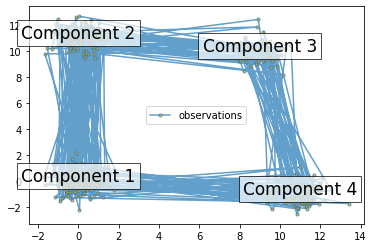

In [3]:
"""
Sampling from HMM
-----------------

This script shows how to sample points from a Hiden Markov Model (HMM):
we use a 4-components with specified mean and covariance.

The plot show the sequence of observations generated with the transitions
between them. We can see that, as specified by our transition matrix,
there are no transition between component 1 and 3.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

##############################################################
# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars
###############################################################

# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()